# Proyek Analisis Data: Bike Sharing Dataset
- **Nama:** Ragil Pamungkas
- **Email:** ragilpamungkas7@gmail.com
- **ID Dicoding:** ragilpam

## Menentukan Pertanyaan Bisnis

1. Bagaimana tren jumlah penyewaan sepeda dari waktu ke waktu?
2. Pada hari dan jam berapa penyewaan sepeda paling tinggi?
3. Apakah ada perbedaan jumlah penyewaan sepeda antara hari kerja dan akhir pekan?
4. Bagaimana pengaruh kondisi cuaca terhadap jumlah penyewaan sepeda?
5. Bagaimana perbandingan antara penyewa casual dan registered?

## Import Semua Packages/Library yang Digunakan

In [232]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

In [233]:
#Import Data day_df
day_df = pd.read_csv('https://raw.githubusercontent.com/ragilpam/bike-sharing/refs/heads/main/day.csv')
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [234]:
#Import Data hour_df
hour_df = pd.read_csv("https://raw.githubusercontent.com/ragilpam/bike-sharing/refs/heads/main/hour.csv")
hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


**Insight:**
- Dataset Bike Sharing memiliki 2 file data utama yaitu: day.csv (data agregat per hari) dan hour.csv (data agregat per jam).
- Dari kedua data diatas, data day.csv dan hour.csv mempunyai banyak kolom dan type data yang sama, hanya saja untuk dataset hour.csv mempunyai tambahan kolom 'hr' yang mewakili keterangan jam per hari (0-23).
- Kolom 'season' : Musim saat data dicatat (1: semi, 2: panas, 3: gugur, 4: dingin)
- Kolom 'yr' : Tahun (0: 2011, 1:2012)
- Kolom 'mnth' : Bulan (1-12)
- Kolom 'holiday' : (0: bukan hari libur resmi, 1: hari libur resmi)
- Kolom 'weekday' : Hari dalam seminggu (0: Minggu, 1: Senin, dst)
- Kolom 'workingday' : (1: Hari Kerja, 0: Akhir Pekan)
- Kolom 'weathersit' : Kondisi cuaca (1. Cerah; 2. Berkabut / Berawan; 3. Hujan / Salju Ringan; 4. Hujan / Salju Lebat)
- Kolom 'temp' : Suhu yang telah dinormalisasi dalam satuan Celcius dengan pembagi 41°C (hasil pembagian suhu sebenarnya dengan suhu tertinggi dalam data).
- Kolom 'atemp' : Suhu *terasa* (feeling temperature) yang telah dinormalisasi dalam satuan Celcius dengan pembagi 50°C (hasil pembagian suhu sebenarnya dengan suhu tertinggi dalam data).
- Kolom 'hum' : Kelembapan udara yang dinormalisasi. Nilainya dibagi dengan angka maksimum 100.
- Kolom 'winspeed' : Kecepatan angin yang dinormalisasi, dibagi dengan 67.
- Kolom 'casual' : Jumlah penyewa sepeda non-member (pengguna biasa)
- Kolom 'registered' : Jumlah penyewa sepeda yang terdaftar sebagai member tetap
- Kolom 'cnt' : Jumlah total sepeda yang disewa (gabungan dari casual + registered)

### Assessing Data

#### Menilai Data day_df

In [235]:
#Menampilkan Informasi Umum Data day_df
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [236]:
#Cek Missing Value Data day_df
day_df.isna().sum()

,0
instant,0
dteday,0
season,0
yr,0
mnth,0
holiday,0
weekday,0
workingday,0
weathersit,0
temp,0


In [237]:
#Cek Duplikasi Data day_df
day_df.duplicated().sum()
print("Jumlah duplikasi: ", day_df.duplicated().sum())

Jumlah duplikasi:  0


In [238]:
#Menampilkan Statistik Data day_df
day_df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


#### Menilai Data hour_df

In [239]:
#Menampilkan Informasi Umum Data hour_df
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [240]:
#Cek Missing Value Data hour_df
hour_df.isna().sum()

,0
instant,0
dteday,0
season,0
yr,0
mnth,0
hr,0
holiday,0
weekday,0
workingday,0
weathersit,0


In [241]:
#Cek Duplikasi Data hour_df
hour_df.duplicated().sum()
print("Jumlah duplikasi: ", hour_df.duplicated().sum())

Jumlah duplikasi:  0


In [242]:
#Menampilkan Statistik Data hour_df
hour_df.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


**Insight:**
- Data day_df memiliki ukuran (731 baris, 16 kolom)
- Data hour_df memiliki ukuran (17379 baris, 17 kolom)
- Dari assessing data day_df dan hour_df ditemukan masalah, sebagai berikut:
  1. kolom dteday harusnya bertype data 'datetime'
  2. kolom season, yr, mnth, hr, holiday, weekday, workingday, weathersit harusnya bertype data 'category'
- Dari assessing data day_df dan hour_df tidak ditemukan duplikat data / missing value.

### Cleaning Data

#### Cleaning Data day_df

In [243]:
#Memperbaiki ke Type Data 'datetime'
day_df['dteday'] = pd.to_datetime(day_df['dteday'])

In [244]:
#Memperbaiki ke Type Data 'category'
category_columns = ['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday', 'weathersit']

for column in category_columns:
     day_df[column] = day_df[column].astype('category')

In [245]:
#Cek Nilai Statistik Kolom yang Dinormalisasi
day_df[['temp', 'atemp', 'hum', 'windspeed', 'cnt']].describe()

,temp,atemp,hum,windspeed,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000
mean,0.495385,0.474354,0.627894,0.190486,4504.348837
std,0.183051,0.162961,0.142429,0.077498,1937.211452
min,0.059130,0.079070,0.000000,0.022392,22.000000
25%,0.337083,0.337842,0.520000,0.134950,3152.000000
50%,0.498333,0.486733,0.626667,0.180975,4548.000000
75%,0.655417,0.608602,0.730209,0.233214,5956.000000
max,0.861667,0.840896,0.972500,0.507463,8714.000000


In [246]:
#Cek Validasi Data Setelah Cleaning
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     731 non-null    int64         
 1   dteday      731 non-null    datetime64[ns]
 2   season      731 non-null    category      
 3   yr          731 non-null    category      
 4   mnth        731 non-null    category      
 5   holiday     731 non-null    category      
 6   weekday     731 non-null    category      
 7   workingday  731 non-null    category      
 8   weathersit  731 non-null    category      
 9   temp        731 non-null    float64       
 10  atemp       731 non-null    float64       
 11  hum         731 non-null    float64       
 12  windspeed   731 non-null    float64       
 13  casual      731 non-null    int64         
 14  registered  731 non-null    int64         
 15  cnt         731 non-null    int64         
dtypes: category(7), datetime64

In [247]:
#Cek Data 5 Baris Awal
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [248]:
#Mapping Data day_df
day_df['yr'] = day_df['yr'].map({0: 2011, 1: 2012})

day_df['season'] = day_df['season'].map({1: 'Semi', 2: 'Panas', 3: 'Gugur', 4: 'Dingin'})

day_df['mnth'] = day_df['mnth'].map({1: 'Januari', 2: 'Februari', 3: 'Maret', 4: 'April', 5: 'Mei', 6: 'Juni',
                                     7: 'Juli', 8: 'Agustus', 9: 'September', 10: 'Oktober', 11: 'November', 12: 'Desember'})

day_df['holiday'] = day_df['holiday'].map({0: 'Bukan Hari Libur Resmi', 1: 'Hari Libur Resmi'})

day_df['weekday_name'] = day_df['weekday'].map({0: 'Minggu', 1: 'Senin', 2: 'Selasa', 3: 'Rabu',
                                           4: 'Kamis', 5: 'Jumat', 6: 'Sabtu'})

day_df['workingday'] = day_df['workingday'].map({0: 'Akhir Pekan', 1: 'Hari Kerja'})

day_df['weathersit'] = day_df['weathersit'].map({1: 'Cerah', 2: 'Berkabut/Berawan',
                                                 3: 'Hujan/Salju Ringan', 4: 'Hujan/Salju Lebat'})

#### Cleaning Data hour_df

In [249]:
#Memperbaiki ke Type Data 'datetime'
hour_df['dteday'] = pd.to_datetime(hour_df['dteday'])

In [250]:
#Memperbaiki ke Type Data 'category'
category_columns = ['season', 'yr', 'mnth', 'hr', 'holiday', 'weekday', 'workingday', 'weathersit']

for column in category_columns:
     hour_df[column] = hour_df[column].astype('category')

In [251]:
#Cek Nilai Statistik Kolom yang Dinormalisasi
hour_df[['temp', 'atemp', 'hum', 'windspeed', 'cnt']].describe()

,temp,atemp,hum,windspeed,cnt
count,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,0.496987,0.475775,0.627229,0.190098,189.463088
std,0.192556,0.171850,0.192930,0.122340,181.387599
min,0.020000,0.000000,0.000000,0.000000,1.000000
25%,0.340000,0.333300,0.480000,0.104500,40.000000
50%,0.500000,0.484800,0.630000,0.194000,142.000000
75%,0.660000,0.621200,0.780000,0.253700,281.000000
max,1.000000,1.000000,1.000000,0.850700,977.000000


In [252]:
#Cek Validasi Data Setelah Cleaning
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     17379 non-null  int64         
 1   dteday      17379 non-null  datetime64[ns]
 2   season      17379 non-null  category      
 3   yr          17379 non-null  category      
 4   mnth        17379 non-null  category      
 5   hr          17379 non-null  category      
 6   holiday     17379 non-null  category      
 7   weekday     17379 non-null  category      
 8   workingday  17379 non-null  category      
 9   weathersit  17379 non-null  category      
 10  temp        17379 non-null  float64       
 11  atemp       17379 non-null  float64       
 12  hum         17379 non-null  float64       
 13  windspeed   17379 non-null  float64       
 14  casual      17379 non-null  int64         
 15  registered  17379 non-null  int64         
 16  cnt         17379 non-

In [253]:
#Cek Data 5 Baris Awal
hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [254]:
#Mapping Data hour_df
hour_df['yr'] = hour_df['yr'].map({0: 2011, 1: 2012})

hour_df['season'] = hour_df['season'].map({1: 'Semi', 2: 'Panas', 3: 'Gugur', 4: 'Dingin'})

hour_df['mnth'] = hour_df['mnth'].map({1: 'Januari', 2: 'Februari', 3: 'Maret', 4: 'April', 5: 'Mei', 6: 'Juni',
                                     7: 'Juli', 8: 'Agustus', 9: 'September', 10: 'Oktober', 11: 'November', 12: 'Desember'})

hour_df['holiday'] = hour_df['holiday'].map({0: 'Bukan Hari Libur Resmi', 1: 'Hari Libur Resmi'})

hour_df['weekday_name'] = hour_df['weekday'].map({0: 'Minggu', 1: 'Senin', 2: 'Selasa', 3: 'Rabu',
                                           4: 'Kamis', 5: 'Jumat', 6: 'Sabtu'})

hour_df['workingday'] = hour_df['workingday'].map({0: 'Akhir Pekan', 1: 'Hari Kerja'})

hour_df['weathersit'] = hour_df['weathersit'].map({1: 'Cerah', 2: 'Berkabut/Berawan',
                                                 3: 'Hujan/Salju Ringan', 4: 'Hujan/Salju Lebat'})

**Insight:**

- pada data day_df dan hour_df kolom dteday sudah bertype data 'datetime'.
- kolom season, yr, mnth, hr, holiday, weekday, workingday, weathersit sudah bertype data 'category'.
- tidak ada duplikasi/missing value.
- data dalam rentang yang normal.
- mapping kategori dilakukan untuk mempermudah analisis dan visualisasi data.

## Exploratory Data Analysis (EDA)

### Explore Data day_df

In [255]:
#Menampilkan 5 baris Acak Data day_df
day_df.sample(5)

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,weekday_name
628,629,2012-09-20,Gugur,2012,September,Bukan Hari Libur Resmi,4,Hari Kerja,Cerah,0.546667,0.532192,0.618333,0.118167,939,6781,7720,Kamis
704,705,2012-12-05,Dingin,2012,Desember,Bukan Hari Libur Resmi,3,Hari Kerja,Cerah,0.438333,0.428012,0.485000,0.324021,331,5398,5729,Rabu
348,349,2011-12-15,Dingin,2011,Desember,Bukan Hari Libur Resmi,4,Hari Kerja,Berkabut/Berawan,0.422500,0.412237,0.634167,0.268042,181,3528,3709,Kamis
480,481,2012-04-25,Panas,2012,April,Bukan Hari Libur Resmi,3,Hari Kerja,Cerah,0.476667,0.470317,0.427917,0.118792,655,5541,6196,Rabu
619,620,2012-09-11,Gugur,2012,September,Bukan Hari Libur Resmi,2,Hari Kerja,Cerah,0.577500,0.554292,0.520000,0.092054,1070,6697,7767,Selasa


In [256]:
#Menampilkan Statistik Deskriptif Data day_df
day_df.describe(include='all')

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,weekday_name
count,731.000000,731,731,731.0,731,731,731.0,731,731,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731
unique,NaN,NaN,4,2.0,12,2,7.0,2,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7
top,NaN,NaN,Gugur,2012.0,Januari,Bukan Hari Libur Resmi,0.0,Hari Kerja,Cerah,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Minggu
freq,NaN,NaN,188,366.0,62,710,105.0,500,463,NaN,NaN,NaN,NaN,NaN,NaN,NaN,105
mean,366.000000,2012-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837,NaN
min,1.000000,2011-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000,NaN
25%,183.500000,2011-07-02 12:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000,NaN
50%,366.000000,2012-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000,NaN
75%,548.500000,2012-07-01 12:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000,NaN
max,731.000000,2012-12-31 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000,NaN


In [257]:
day_df.groupby('yr', observed=True)['cnt'].mean()

,cnt
yr,
2011,3405.761644
2012,5599.934426


In [258]:
day_df.groupby('season', observed=True)['cnt'].mean()

,cnt
season,
Semi,2604.132597
Panas,4992.331522
Gugur,5644.303191
Dingin,4728.162921


In [259]:
day_df.groupby('weathersit', observed=True)['cnt'].mean()

,cnt
weathersit,
Cerah,4876.786177
Berkabut/Berawan,4035.862348
Hujan/Salju Ringan,1803.285714


In [260]:
day_df.groupby('workingday', observed=True)['cnt'].mean()

,cnt
workingday,
Akhir Pekan,4330.168831
Hari Kerja,4584.820000


In [261]:
daily_trend = day_df.groupby('dteday')['cnt'].sum().reset_index()
daily_trend.head()

,dteday,cnt
0,2011-01-01,985
1,2011-01-02,801
2,2011-01-03,1349
3,2011-01-04,1562
4,2011-01-05,1600


In [262]:
monthly_trend = day_df.groupby('mnth', observed=True)['cnt'].sum().reset_index()
monthly_trend.head()

,mnth,cnt
0,Januari,134933
1,Februari,151352
2,Maret,228920
3,April,269094
4,Mei,331686


In [263]:
#Mengelompokkan hari kerja dan akhir pekan pada kolom 'weekday'
day_df['day_type'] = day_df['weekday'].apply(lambda x: 'Akhir Pekan' if x == 0 or x == 6 else 'Hari Kerja')

In [264]:
#Menghitung rata-rata penyewaan sepeda di hari weekday dan weekend
average_bike = day_df.groupby('day_type')['cnt'].mean().reset_index()

print("Rata-rata jumlah penyewaan sepeda:")
average_bike

Rata-rata jumlah penyewaan sepeda:


,day_type,cnt
0,Akhir Pekan,4389.685714
1,Hari Kerja,4550.566219


In [265]:
day_df.groupby('day_type', observed=True)[['casual', 'registered']].mean()

,casual,registered
day_type,,
Akhir Pekan,1401.776190,2987.909524
Hari Kerja,625.036468,3925.529750


### Explore Data hour_df

In [266]:
#Menampilkan 5 baris Acak Data hour_df
hour_df.sample(5)

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,weekday_name
2425,2426,2011-04-15,Panas,2011,April,23,Hari Libur Resmi,5,Akhir Pekan,Berkabut/Berawan,0.36,0.3485,0.81,0.1940,8,56,64,Jumat
13691,13692,2012-07-29,Gugur,2012,Juli,16,Bukan Hari Libur Resmi,0,Akhir Pekan,Cerah,0.80,0.7273,0.43,0.1343,191,330,521,Minggu
5796,5797,2011-09-03,Gugur,2011,September,23,Bukan Hari Libur Resmi,6,Akhir Pekan,Cerah,0.66,0.6212,0.85,0.1343,46,77,123,Sabtu
3509,3510,2011-05-31,Panas,2011,Mei,3,Bukan Hari Libur Resmi,2,Hari Kerja,Berkabut/Berawan,0.64,0.5606,0.94,0.0000,1,3,4,Selasa
2330,2331,2011-04-12,Panas,2011,April,0,Bukan Hari Libur Resmi,2,Hari Kerja,Berkabut/Berawan,0.62,0.6212,0.50,0.1045,11,13,24,Selasa


In [267]:
#Menampilkan Statistik Deskriptif Data hour_df
hour_df.describe(include='all')

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,weekday_name
count,17379.0000,17379,17379,17379.0,17379,17379.0,17379,17379.0,17379,17379,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379
unique,NaN,NaN,4,2.0,12,24.0,2,7.0,2,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7
top,NaN,NaN,Gugur,2012.0,Juli,16.0,Bukan Hari Libur Resmi,6.0,Hari Kerja,Cerah,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Sabtu
freq,NaN,NaN,4496,8734.0,1488,730.0,16879,2512.0,11865,11413,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2512
mean,8690.0000,2012-01-02 04:08:34.552045568,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088,NaN
min,1.0000,2011-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,NaN
25%,4345.5000,2011-07-04 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000,NaN
50%,8690.0000,2012-01-02 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000,NaN
75%,13034.5000,2012-07-02 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000,NaN
max,17379.0000,2012-12-31 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000,NaN


In [268]:
hour_df.groupby('yr', observed=True)['cnt'].mean()

,cnt
yr,
2011,143.794448
2012,234.666361


In [269]:
hour_df.groupby('hr', observed=True)['cnt'].mean()

,cnt
hr,
0,53.898072
1,33.375691
2,22.869930
3,11.727403
4,6.352941
5,19.889819
6,76.044138
7,212.064649
8,359.011004


In [270]:
hour_df.groupby('weekday_name', observed=True)['cnt'].mean()

,cnt
weekday_name,
Minggu,177.468825
Senin,183.744655
Selasa,191.238891
Rabu,191.130505
Kamis,196.436665
Jumat,196.135907
Sabtu,190.209793


In [271]:
hour_df.groupby('mnth', observed=True)['cnt'].mean()

,cnt
mnth,
Januari,94.424773
Februari,112.865026
Maret,155.410726
April,187.260960
Mei,222.907258
Juni,240.515278
Juli,231.819892
Agustus,238.097627
September,240.773138


In [272]:
hour_df.groupby('season', observed=True)['cnt'].mean()

,cnt
season,
Semi,111.114569
Panas,208.344069
Gugur,236.016237
Dingin,198.868856


In [273]:
hour_df.groupby(['weathersit', 'hr'], observed=True)['cnt'].mean()

weathersit          hr
Cerah               0      59.161554
                    1      34.395918
                    2      22.817992
                    3      11.995604
                    4       6.413567
                             ...    
Hujan/Salju Ringan  22     70.345455
                    23     49.373134
Hujan/Salju Lebat   1      23.000000
                    16     36.000000
                    18    164.000000
Name: cnt, Length: 75, dtype: float64

In [274]:
hour_df.groupby('hr', observed=True)[['casual', 'registered']].mean()

,casual,registered
hr,,
0,10.158402,43.739669
1,6.504144,26.871547
2,4.772028,18.097902
3,2.715925,9.011478
4,1.253945,5.098996
5,1.411437,18.478382
6,4.161379,71.882759
7,11.055021,201.009629
8,21.679505,337.331499


## Visualization & Explanatory Analysis

### Pertanyaan 1: Bagaimana tren jumlah penyewaan sepeda dari waktu ke waktu?

In [275]:
#Menggabungkan Data day_df dan hour_df
all_df = pd.concat([day_df, hour_df])
all_df.sample(5)

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,weekday_name,day_type,hr
12237,12238,2012-05-30,Panas,2012,Mei,Bukan Hari Libur Resmi,3,Hari Kerja,Hujan/Salju Ringan,0.62,0.5455,0.94,0.0896,1,4,5,Rabu,NaN,2
2937,2938,2011-05-07,Panas,2011,Mei,Bukan Hari Libur Resmi,6,Akhir Pekan,Cerah,0.48,0.4697,0.59,0.0000,8,32,40,Sabtu,NaN,7
3573,3574,2011-06-02,Panas,2011,Juni,Bukan Hari Libur Resmi,4,Hari Kerja,Cerah,0.72,0.6364,0.23,0.2985,58,321,379,Kamis,NaN,19
16854,16855,2012-12-10,Dingin,2012,Desember,Bukan Hari Libur Resmi,1,Hari Kerja,Berkabut/Berawan,0.36,0.3788,1.00,0.0000,0,4,4,Senin,NaN,1
2185,2186,2011-04-05,Panas,2011,April,Bukan Hari Libur Resmi,2,Hari Kerja,Cerah,0.32,0.3030,0.49,0.2985,3,43,46,Selasa,NaN,22


In [276]:
#Data Tren Harian
daily_trend = day_df.groupby('dteday')['cnt'].sum().reset_index()
daily_trend.head()

,dteday,cnt
0,2011-01-01,985
1,2011-01-02,801
2,2011-01-03,1349
3,2011-01-04,1562
4,2011-01-05,1600


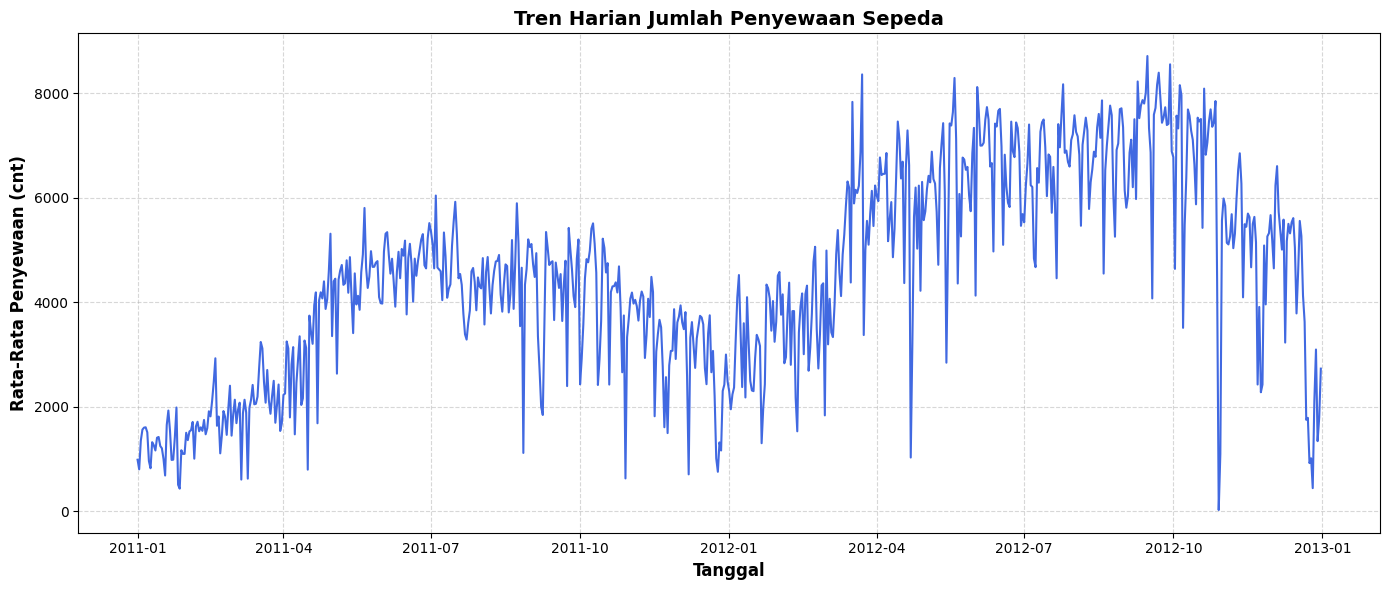

In [277]:
#Visualisasi tren harian
plt.figure(figsize=(14,6))
sns.lineplot(data=daily_trend, x='dteday', y='cnt', color='royalblue')
plt.title('Tren Harian Jumlah Penyewaan Sepeda', fontsize=14, weight='bold')
plt.xlabel('Tanggal', fontsize=12, weight='bold')
plt.ylabel('Rata-Rata Penyewaan (cnt)', fontsize=12, weight='bold')
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

In [278]:
#Rata-Rata Jumlah Penyewaan per minggu
weekly_trend = daily_trend.resample('W', on='dteday').mean().reset_index()

print('Rata-Rata Jumlah Penyewaan per Minggu')
weekly_trend


Rata-Rata Jumlah Penyewaan per Minggu


,dteday,cnt
0,2011-01-02,893.000000
1,2011-01-09,1344.000000
2,2011-01-16,1289.285714
3,2011-01-23,1252.857143
4,2011-01-30,1099.857143
...,...,...
101,2012-12-09,5394.571429
102,2012-12-16,5138.000000
103,2012-12-23,3813.714286
104,2012-12-30,1531.428571


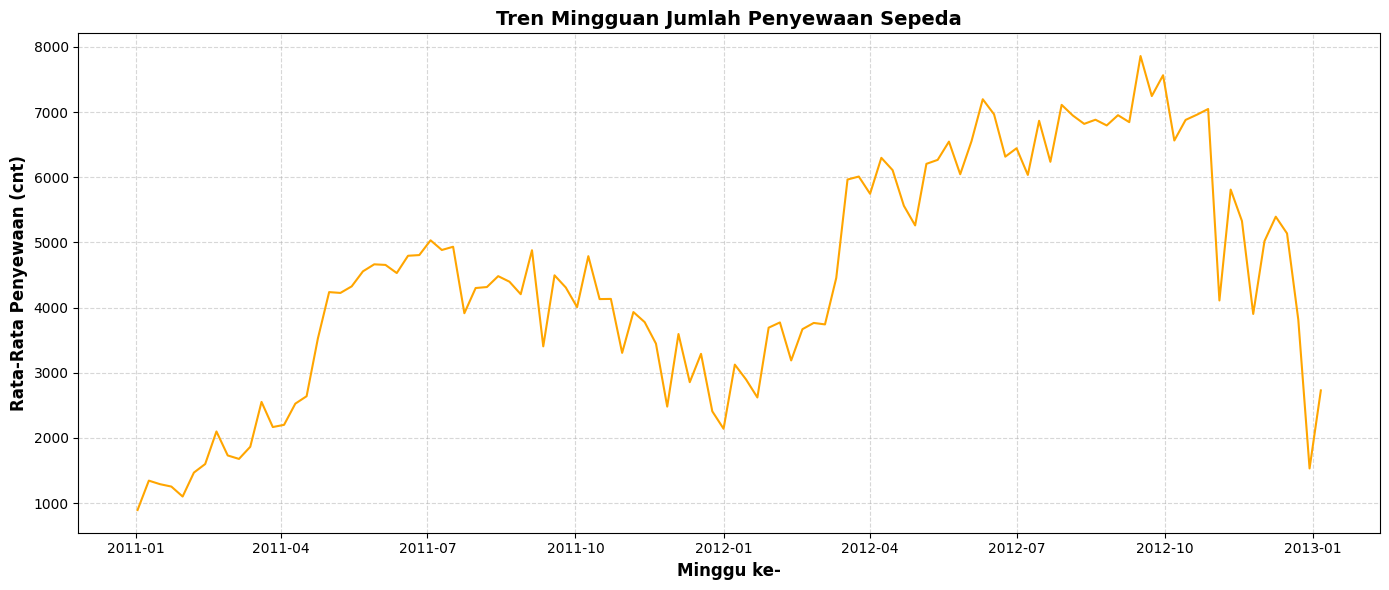

In [279]:
#Visualisasi Tren Mingguan
plt.figure(figsize=(14,6))
sns.lineplot(data=weekly_trend, x='dteday', y='cnt', color='orange')
plt.title('Tren Mingguan Jumlah Penyewaan Sepeda', fontsize=14, weight='bold')
plt.xlabel('Minggu ke-', fontsize=12, weight='bold')
plt.ylabel('Rata-Rata Penyewaan (cnt)', fontsize=12, weight='bold')
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

In [280]:
#Rata-Rata Jumlah Penyewaan per Bulan
monthly_trend = daily_trend.resample('ME', on='dteday').mean().reset_index()

print('Rata-Rata Jumlah Penyewaan per Bulan')
monthly_trend

Rata-Rata Jumlah Penyewaan per Bulan


,dteday,cnt
0,2011-01-31,1231.903226
1,2011-02-28,1721.964286
2,2011-03-31,2065.967742
3,2011-04-30,3162.333333
4,2011-05-31,4381.322581
5,2011-06-30,4783.733333
6,2011-07-31,4559.387097
7,2011-08-31,4409.387097
8,2011-09-30,4247.266667
9,2011-10-31,3984.225806


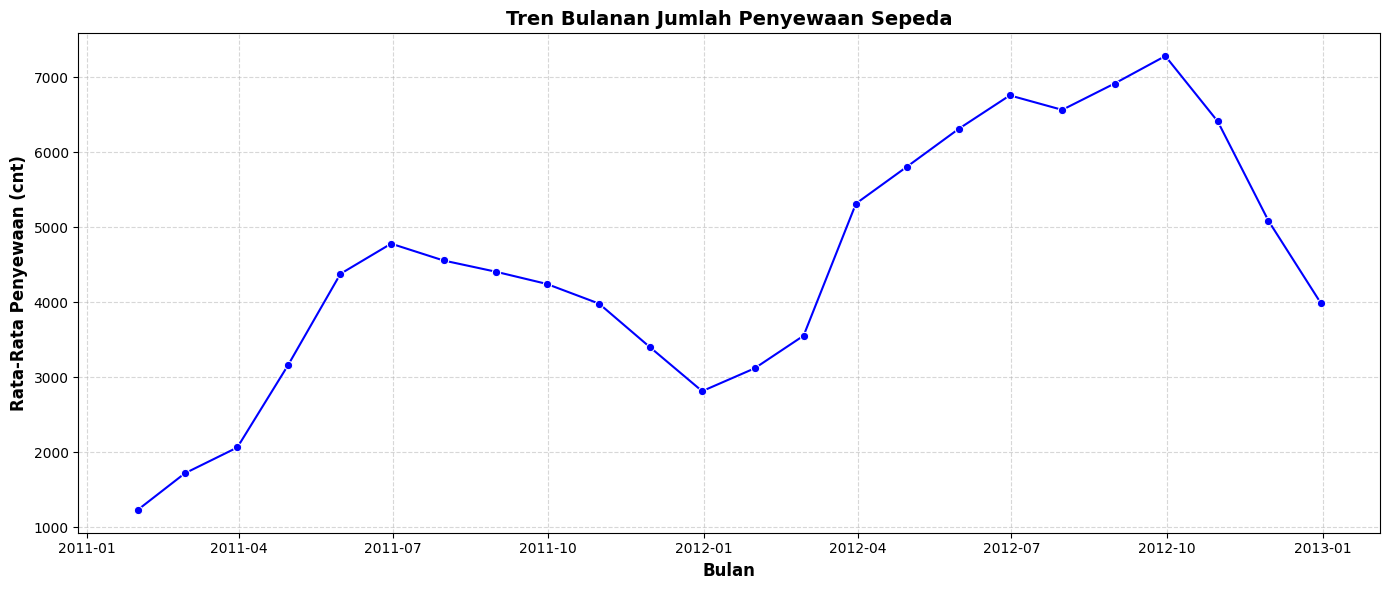

In [281]:
#Visualisasi Tren Bulanan
plt.figure(figsize=(14,6))
sns.lineplot(data=monthly_trend, x='dteday', y='cnt', color='blue', marker='o')
plt.title('Tren Bulanan Jumlah Penyewaan Sepeda', fontsize=14, weight='bold')
plt.xlabel('Bulan', fontsize=12, weight='bold')
plt.ylabel('Rata-Rata Penyewaan (cnt)', fontsize=12, weight='bold')
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

In [282]:
#Rata-Rata Jumlah Penyewaan per Tahun
yearly_trend = daily_trend.resample('YE', on='dteday').mean().reset_index()

print('Rata-Rata Jumlah Penyewaan per Tahun')
yearly_trend

Rata-Rata Jumlah Penyewaan per Tahun


,dteday,cnt
0,2011-12-31,3405.761644
1,2012-12-31,5599.934426


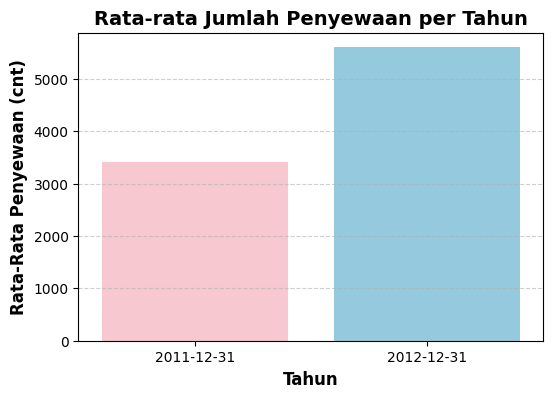

In [283]:
#Visualisasi Tren Tahunan
plt.figure(figsize=(6,4))
sns.barplot(x='dteday', y='cnt', data=yearly_trend, hue='dteday', palette=['pink', 'skyblue'])
plt.title('Rata-rata Jumlah Penyewaan per Tahun', fontsize=14, weight='bold')
plt.xlabel('Tahun', fontsize=12, weight='bold')
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.ylabel('Rata-Rata Penyewaan (cnt)', fontsize=12, weight='bold')

plt.show()

### Pertanyaan 2: Pada hari dan jam berapa penyewaan sepeda paling tinggi?

In [284]:
#Rata-Rata Penyewaan Berdasarkan Hari dan Jam
bike_heatmap = hour_df.groupby(['weekday_name', 'hr'], observed=True)['cnt'].mean().unstack()
bike_heatmap.head(7)

hr,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
weekday_name,,,,,,,,,,,,,,,,,,,,,
Minggu,93.990385,77.432692,61.627451,31.144231,9.362745,8.693878,14.495146,33.104762,83.857143,156.542857,...,363.628571,353.933333,355.400000,318.771429,272.628571,225.476190,168.028571,127.647619,94.123810,61.895238
Senin,34.009524,17.307692,10.313131,5.113402,5.785714,21.653846,85.865385,248.538462,412.192308,218.442308,...,192.701923,202.365385,284.451923,502.394231,481.346154,344.576923,242.076923,174.538462,115.759615,65.403846
Selasa,27.623762,12.540000,6.801980,4.152174,5.131313,24.455446,106.500000,299.696078,471.784314,236.450980,...,168.365385,186.903846,286.701923,544.278846,517.567308,353.923077,253.192308,186.230769,132.278846,76.173077
Rabu,34.557692,15.336538,7.813725,4.888889,4.968750,25.750000,107.807692,303.980769,488.326923,238.528846,...,170.548077,181.288462,272.961538,513.144231,494.029126,357.504854,256.660194,194.669903,143.689320,83.737864
Kamis,39.271845,17.223301,9.156863,5.071429,5.280000,25.912621,107.436893,304.737864,488.572816,240.873786,...,177.563107,196.475728,286.298077,527.346154,502.096154,358.451923,268.913462,197.884615,147.240385,96.750000
Jumat,52.432692,24.721154,12.740385,6.598039,6.072165,23.903846,90.028846,254.326923,462.278846,258.990385,...,229.365385,252.461538,330.990385,492.413462,420.990385,302.067308,213.326923,169.875000,147.067308,115.211538
Sabtu,94.304762,67.780952,50.495238,22.885714,7.657143,8.291262,21.000000,45.961905,114.476190,186.790476,...,381.333333,382.428571,366.142857,334.409524,292.048077,239.932692,180.865385,156.000000,139.663462,115.855769


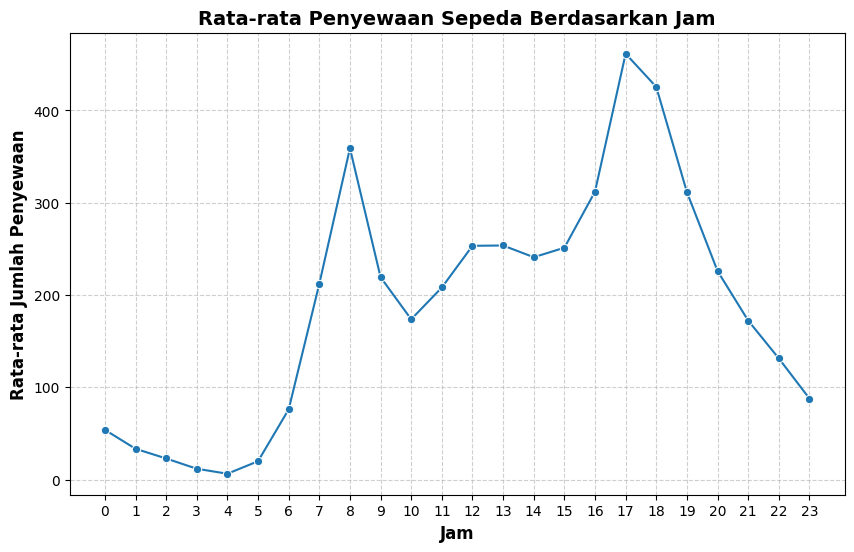

In [285]:
#Visualisasi rata-rata penyewaan berdasar jam
plt.figure(figsize=(10,6))
sns.lineplot(data=hour_df, x='hr', y='cnt', marker='o', estimator='mean', errorbar=None)
plt.title('Rata-rata Penyewaan Sepeda Berdasarkan Jam', fontsize=14, weight='bold')
plt.xlabel('Jam', fontsize=12, weight='bold')
plt.ylabel('Rata-rata Jumlah Penyewaan', fontsize=12, weight='bold')
plt.xticks(range(0,24))
plt.grid(linestyle='--', alpha=0.6)
plt.show()

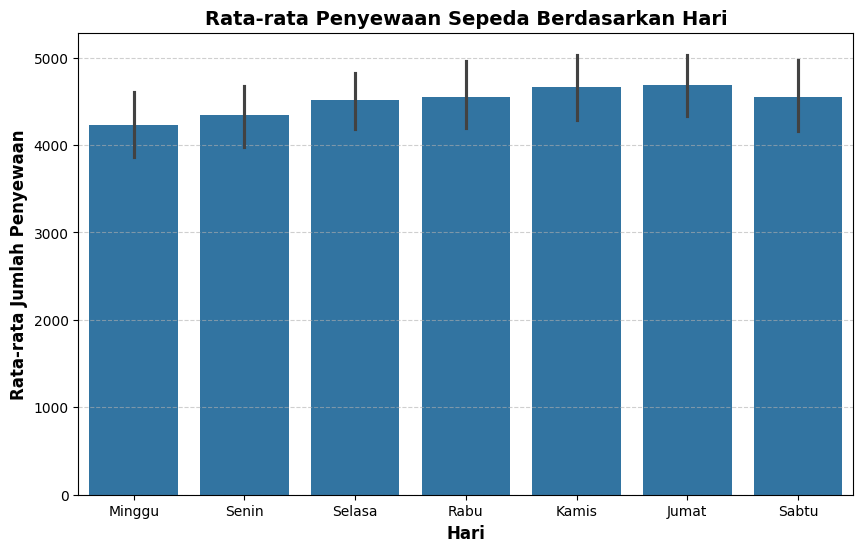

In [286]:
#Visualisasi rata-rata penyewaan berdasar hari
plt.figure(figsize=(10,6))
sns.barplot(data=day_df, x='weekday_name', y='cnt', estimator='mean')
plt.title('Rata-rata Penyewaan Sepeda Berdasarkan Hari', fontsize=14, weight='bold')
plt.xlabel('Hari', fontsize=12, weight='bold')
plt.ylabel('Rata-rata Jumlah Penyewaan', fontsize=12, weight='bold')
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.show()

### Pertanyaan 3: Apakah ada perbedaan jumlah penyewaan sepeda antara hari kerja dan akhir pekan?

In [287]:
#Rata-rata penyewaan berdasar workingday
average_workingday = (day_df.groupby('workingday', observed=True)['cnt'].mean().reset_index())

average_workingday


,workingday,cnt
0,Akhir Pekan,4330.168831
1,Hari Kerja,4584.820000


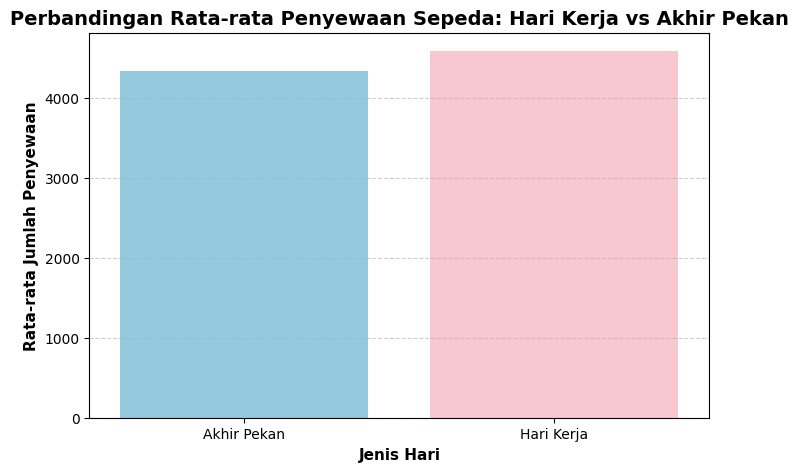

In [288]:
plt.figure(figsize=(8,5))
sns.barplot(data=average_workingday, x='workingday', y='cnt', hue='workingday', palette=['skyblue', 'pink'], legend=False)

plt.title('Perbandingan Rata-rata Penyewaan Sepeda: Hari Kerja vs Akhir Pekan', fontsize=14, weight='bold')
plt.xlabel('Jenis Hari', fontsize=11, weight='bold')
plt.ylabel('Rata-rata Jumlah Penyewaan', fontsize=11, weight='bold')
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.show()

In [289]:
#Rata-rata penyewaan berdasar weekday
average_weekday = (hour_df.groupby('weekday_name', observed=True)['cnt'].mean().reset_index())

average_weekday

,weekday_name,cnt
0,Minggu,177.468825
1,Senin,183.744655
2,Selasa,191.238891
3,Rabu,191.130505
4,Kamis,196.436665
5,Jumat,196.135907
6,Sabtu,190.209793


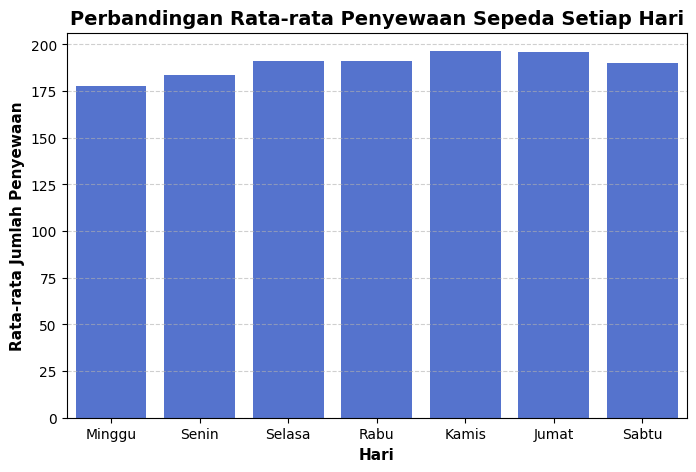

In [290]:
plt.figure(figsize=(8,5))
sns.barplot(data=average_weekday, x='weekday_name', y='cnt', color='royalblue')

plt.title('Perbandingan Rata-rata Penyewaan Sepeda Setiap Hari', fontsize=14, weight='bold')
plt.xlabel('Hari', fontsize=11, weight='bold')
plt.ylabel('Rata-rata Jumlah Penyewaan', fontsize=11, weight='bold')
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.show()

###Pertanyaan 4: Bagaimana pengaruh kondisi cuaca terhadap jumlah penyewaan sepeda?

In [291]:
#Rata-rata penyewaan berdasarkan kondisi cuaca per hari nya
average_weather_day = day_df.groupby('weathersit', observed=True)['cnt'].mean().reset_index()

average_weather_day

,weathersit,cnt
0,Cerah,4876.786177
1,Berkabut/Berawan,4035.862348
2,Hujan/Salju Ringan,1803.285714


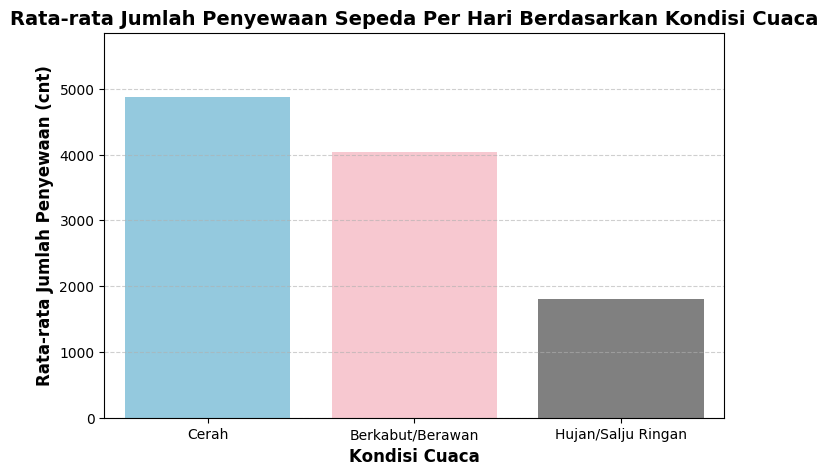

In [292]:
plt.figure(figsize=(8,5))
sns.barplot(data = average_weather_day, x='weathersit', y='cnt', hue='weathersit', palette=['skyblue', 'pink', 'grey']
)

plt.title('Rata-rata Jumlah Penyewaan Sepeda Per Hari Berdasarkan Kondisi Cuaca', fontsize=14, weight='bold')
plt.xlabel('Kondisi Cuaca', fontsize=12, weight='bold')
plt.ylabel('Rata-rata Jumlah Penyewaan (cnt)', fontsize=12, weight='bold')
plt.ylim(0, average_weather_day['cnt'].max() * 1.2)
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.show()

In [293]:
#Rata-rata penyewaan berdasarkan kondisi cuaca per jam nya
average_weather_hour = (hour_df.groupby(['weathersit', 'hr'], observed=True)['cnt'].mean().reset_index())

average_weather_hour

,weathersit,hr,cnt
0,Cerah,0,59.161554
1,Cerah,1,34.395918
2,Cerah,2,22.817992
3,Cerah,3,11.995604
4,Cerah,4,6.413567
...,...,...,...
70,Hujan/Salju Ringan,22,70.345455
71,Hujan/Salju Ringan,23,49.373134
72,Hujan/Salju Lebat,1,23.000000
73,Hujan/Salju Lebat,16,36.000000


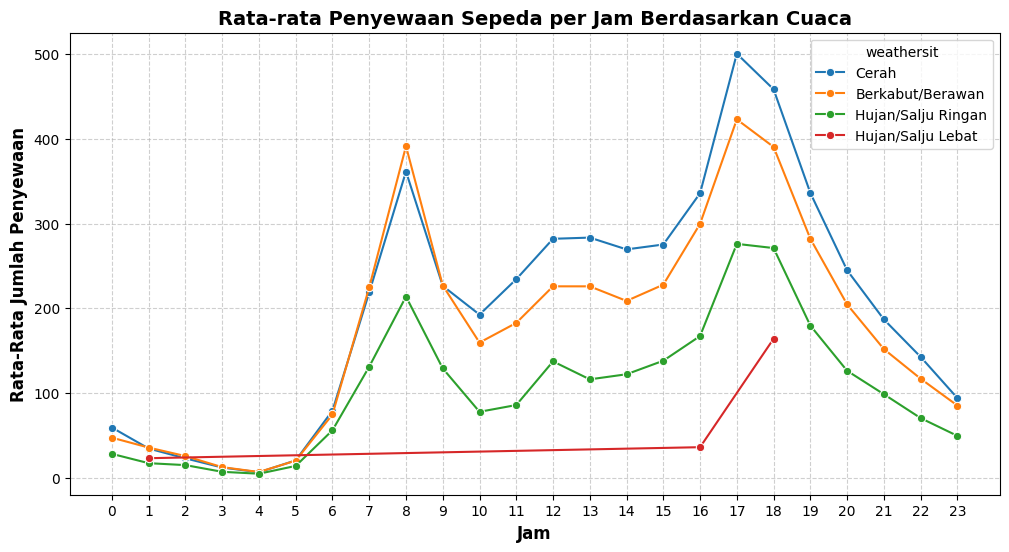

In [294]:
plt.figure(figsize=(12,6))
sns.lineplot(data=average_weather_hour, x='hr', y='cnt', hue='weathersit', marker='o')
plt.title('Rata-rata Penyewaan Sepeda per Jam Berdasarkan Cuaca', fontsize=14, weight='bold')
plt.xlabel('Jam', fontsize=12, weight='bold')
plt.ylabel('Rata-Rata Jumlah Penyewaan', fontsize=12, weight='bold')
plt.xticks(range(0,24))
plt.grid(linestyle='--', alpha=0.6)
plt.show()

###Pertanyaan 5: Bagaimana perbandingan antara penyewa casual dan registered?

In [295]:
#Statistik dasar penyewa casual dan registered
casual_registered_stats = day_df[['casual', 'registered']].describe()
casual_registered_stats

,casual,registered
count,731.000000,731.000000
mean,848.176471,3656.172367
std,686.622488,1560.256377
min,2.000000,20.000000
25%,315.500000,2497.000000
50%,713.000000,3662.000000
75%,1096.000000,4776.500000
max,3410.000000,6946.000000


In [296]:
#Rata-rata penyewa casual vs registered
average_casual_registered = day_df[['casual', 'registered']].mean()
average_casual_registered

,0
casual,848.176471
registered,3656.172367


In [297]:
#Data Frame baru untuk visualisasi
average_users = average_casual_registered.reset_index()
average_users.columns = ['User_Type', 'Average_Usage']

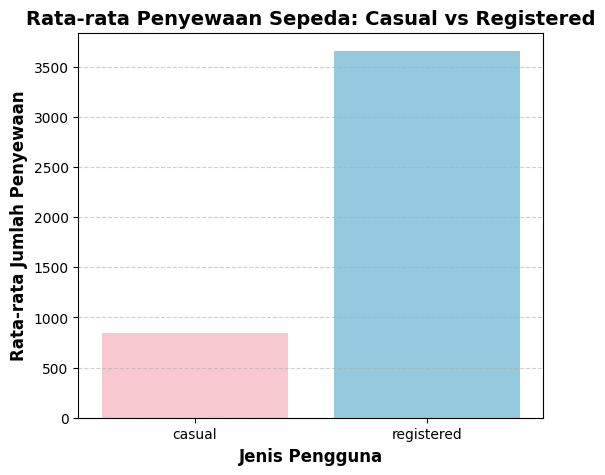

In [298]:
plt.figure(figsize=(6,5))
sns.barplot(data=average_users, x='User_Type', y='Average_Usage', hue='User_Type', palette=['pink', 'skyblue'])

plt.title('Rata-rata Penyewaan Sepeda: Casual vs Registered', fontsize=14, weight='bold')
plt.xlabel('Jenis Pengguna', fontsize=12, weight='bold')
plt.ylabel('Rata-rata Jumlah Penyewaan', fontsize=12, weight='bold')
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.show()

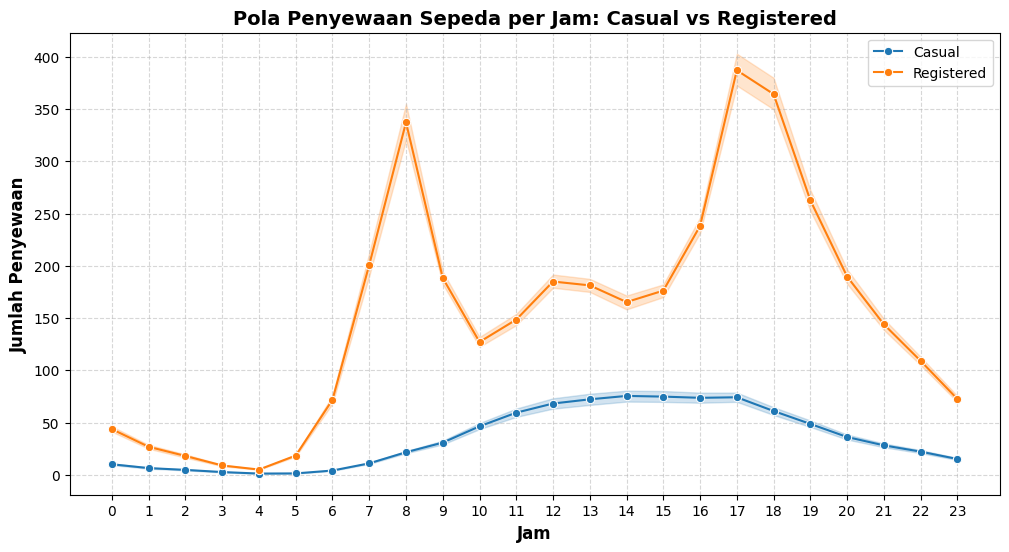

In [299]:
plt.figure(figsize=(12,6))
sns.lineplot(data=hour_df, x='hr', y='casual', label='Casual', marker='o')
sns.lineplot(data=hour_df, x='hr', y='registered', label='Registered', marker='o')

plt.title('Pola Penyewaan Sepeda per Jam: Casual vs Registered', fontsize=14, weight='bold')
plt.xlabel('Jam', weight='bold', fontsize=12)
plt.ylabel('Jumlah Penyewaan', weight='bold', fontsize=12)
plt.xticks(range(0,24))
plt.grid(linestyle='--', alpha=0.5)
plt.legend()
plt.show()

**Insight:**

Dari proses EDA dan Visualisasi di atas ditemukan beberapa informasi sebagai berikut:
- Penyewaan sepeda meningkat signifikan dari 2011 ke 2012 (rata-rata 90 unit per jam), menunjukkan popularitas bike sharing yang meningkat.
- Tren harian dan bulanan menunjukkan permintaan naik setelah hari libur dan meningkat mendekati musim panas-gugur, kemudian menurun di akhir tahun.
- Penyewaan tertinggi terjadi di musim gugur dan saat cuaca cerah. Penyewaan terendah terjadi di musim semi dan saat cuaca hujan/salju.
- Puncak penyewaan terjadi pada jam sibuk pagi (sekitar jam 8) dan sore (jam 5–6), terutama pada hari Kamis dan Jumat. Hari kerja memiliki penyewaan sedikit lebih tinggi dibanding akhir pekan.
- Registered users lebih sering menyewa untuk mobilitas rutin sehari-hari (jam kerja). Casual users lebih aktif di akhir pekan, dengan puncak di siang hingga sore hari.
- Cuaca cerah mendukung jumlah penyewaan tertinggi. Cuaca berawan atau berkabut menurunkan jumlah penyewaan sedikit, namun masih cukup tinggi. Hujan atau salju menyebabkan penurunan tajam jumlah penyewaan.

## Analisis Lanjutan (Clustering)

### Grouping Data

In [300]:
#Grouping Berdasarkan Jam (hour_df)
def hour_group(hr):
    if hr < 6:
        return 'Dini Hari'
    elif hr < 12:
        return 'Pagi'
    elif hr < 18:
        return 'Siang-Sore'
    else:
        return 'Malam'

hour_df['hour_group'] = hour_df['hr'].apply(hour_group)

In [301]:
#Grouping Jumlah Penyewaan
def sharing_group(cnt):
    if cnt < 100:
        return 'Rendah'
    elif cnt < 300:
        return 'Medium'
    else:
        return 'Tinggi'

hour_df['sharing_group'] = hour_df['cnt'].apply(sharing_group)

In [302]:
#Grouping berdasarkan hari (day_df)
day_df['day_type'] = day_df['weekday'].apply(lambda x: 'Akhir Pekan' if x == 0 or x == 6 else 'Hari Kerja')

In [303]:
#Grouping berdasarkan cuaca
day_df['weather_group'] = day_df['weathersit']

### Analisis Cluster Manual

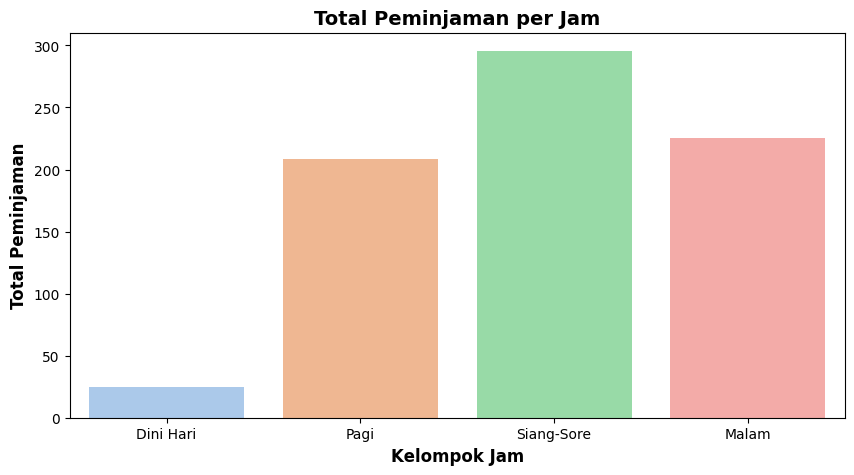

In [304]:
#Total Penyewaan Per Group
plt.figure(figsize=(10,5))
sns.barplot(data=hour_df, x='hour_group', y='cnt', errorbar=None, hue='hour_group', palette='pastel')
plt.title('Total Peminjaman per Jam', fontsize=14, weight='bold')
plt.ylabel('Total Peminjaman', fontsize=12, weight='bold')
plt.xlabel('Kelompok Jam', fontsize=12, weight='bold')
plt.show()

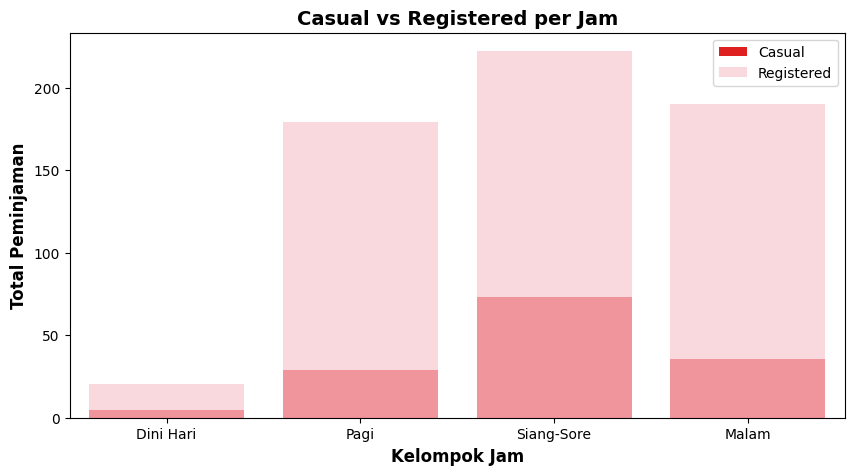

In [305]:
#Casual vs Registered Per jam Group
plt.figure(figsize=(10,5))
sns.barplot(data=hour_df, x='hour_group', y='casual', errorbar=None, color='red', label='Casual')
sns.barplot(data=hour_df, x='hour_group', y='registered', errorbar=None, color='pink', label='Registered', alpha=0.7)
plt.title('Casual vs Registered per Jam', fontsize=14, weight='bold')
plt.ylabel('Total Peminjaman', fontsize=12, weight='bold')
plt.xlabel('Kelompok Jam', fontsize=12, weight='bold')
plt.legend()
plt.show()

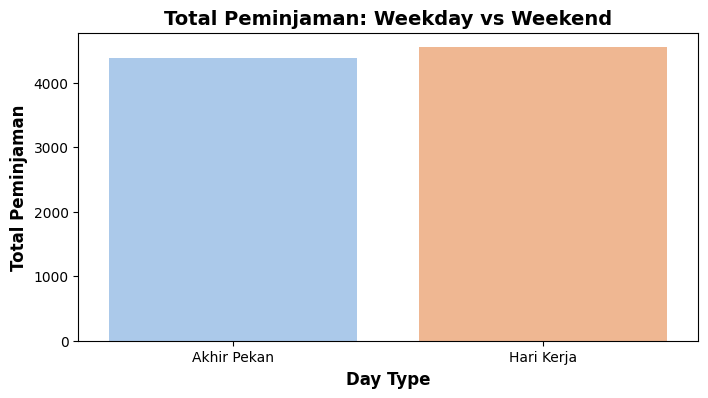

In [306]:
#Peminjaman per day_type
plt.figure(figsize=(8,4))
sns.barplot(data=day_df, x='day_type', y='cnt', errorbar=None, hue='day_type', palette='pastel')
plt.title('Total Peminjaman: Weekday vs Weekend', fontsize=14, weight='bold')
plt.xlabel('Day Type', fontsize=12, weight='bold')
plt.ylabel('Total Peminjaman', fontsize=12, weight='bold')
plt.show()

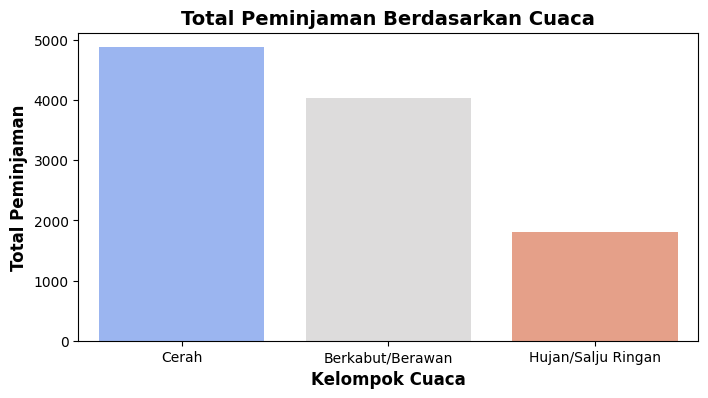

In [307]:
#Peminjaman per weather_group
plt.figure(figsize=(8,4))
sns.barplot(data=day_df, x='weather_group', y='cnt', errorbar=None, hue='weather_group', palette='coolwarm')
plt.title('Total Peminjaman Berdasarkan Cuaca', fontsize=14, weight='bold')
plt.ylabel('Total Peminjaman', fontsize=12, weight='bold')
plt.xlabel('Kelompok Cuaca', fontsize=12, weight='bold')
plt.show()

**Insight:**

Dari analisis lanjutan menggunakan teknik clustering di atas didapatkan beberapa informasi seperti:
1. Jam Sibuk:
Pengguna registered dominan di Pagi & Sore, kemungkinan untuk mobilitas harian.
Pengguna casual lebih tinggi di Siang & Malam, kemungkinan untuk aktivitas santai dan rekreasi.

2. Hari:
Pada akhir pekan pengguna casual meningkat.
Pada hari kerja pengguna registered lebih tinggi.

3. Cuaca:
Kondisi cuaca cerah merupakan kondisi cuaca dengan jumlah penyewaan tertinggi.
Sedangkan kondisi cuaca hujan/salju merupakan kondisi cuaca dengan jumlah penyewaan terendah.

4. Jumlah Penyewaan:
Pengelompokan Rendah/Medium/Tinggi bisa digunakan untuk merencanakan distribusi sepeda atau strategi promosi.

## Conclusion

- Terjadi kenaikan jumlah penyewaan sepeda dari tahun 2011 hingga tahun 2012. Dengan musim gugur dan kondisi cuaca cerah merupakan penyewaan tertinggi.
- Penyewaan sepeda tertinggi pada hari kerja khususnya pada hari Kamis-Jumat. Sedangkan jam penyewaan sepeda tertinggi ada pada jam sibuk pagi hari (8 pagi) dan jam sibuk sore hari (5-6 sore).
- Terdapat perbedaan jumlah penyewaan sepeda pada hari kerja dan akhir pekan. Jumlah penyewaan sepeda sedikit lebih tinggi pada hari kerja daripada akhir pekan. Hal ini dikarenakan banyak penyewa sepeda menggunakan layanan ini untuk aktivitas rutin seperti berangkat kerja atau sekolah.
- Kondisi cuaca menjadi faktor penting yang memengaruhi jumlah penyewaan sepeda. Pengguna cenderung menyewa sepeda ketika cuaca nyaman dan kering.
- Pengguna registered lebih sering menyewa sepeda daripada pengguna casual. Hal ini dikarenakan pengguna registered lebih banyak menyewa sepeda untuk mobilitas sehari-hari.

In [308]:
all_df.to_csv("all_data.csv", index=False)